In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import ast
import seaborn as sns

# imported dataset frm sql

In [2]:
con=sqlite3.connect(r"C:\Users\karna\Desktop\zomato_rawdata.sqlite")

In [3]:
data=pd.read_sql_query("SELECT * FROM USERS",con,index_col="index")

In [4]:
#To find the no of null
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].str.replace(",","")

In [7]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(float)

In [8]:
data['approx_cost(for two people)'].dtype

dtype('float64')

# Data cleaning


Treated rate values

In [9]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
data['rate']=data['rate'].str.replace("/5","")


In [11]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       None, '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [12]:
data['rate'].replace('NEW',np.nan,inplace=True)
data['rate'].replace('None',np.nan,inplace=True)
data['rate'].replace('-',np.nan,inplace=True)

In [13]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', None,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [14]:
data['rate'].isnull().sum()

10052

In [15]:
data['rate'].astype(float)


index
0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [16]:
data['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [17]:
# Check the number of null values in 'rest_type'
null_count = data['rest_type'].isnull().sum()
print(f"Number of null values in 'rest_type': {null_count}")

# Drop rows with null values in 'rest_type'
data.dropna(subset=['rest_type'], inplace=True)

# Check the shape of the DataFrame after dropping the rows
print(data.shape)


Number of null values in 'rest_type': 227
(51490, 17)


In [18]:
data_QB=data[data['rest_type'].str.contains('Quick Bites')]

In [19]:
data_QB.shape

(20639, 17)

In [20]:
data_QB

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
index,,,,,,,,,,,,,,,,,
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600.0,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200.0,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",NaN,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,None,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200.0,[],[],Dine-out,Whitefield
51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,None,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300.0,[],[],Dine-out,Whitefield


# Visualizing a wordcloud

In [21]:
dish_likes=data_QB['dish_liked'].str.lower().str.cat()

In [22]:
dish_likes

'masala dosapasta, iced teaburgers, lassi, chicken grill, naan, momos, chicken burger, biryanirolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrapdabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuriburgers, fries, hot chocolatepane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacosbiryaniparatha, pastapasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghettigrape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rollsvegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryanirolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese rollbenne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosamasala dosapanipuri, chaat, noodles, dahi bhallerooftop ambiencecoffee, tea, kesari bath, open dosa, vada, idli, bread dosamasala dosa, tirupathi pongal, filter coffee, vada

In [23]:
from wordcloud import WordCloud

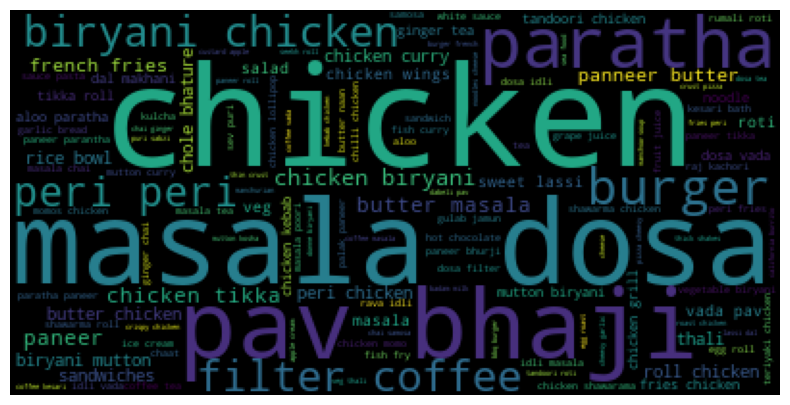

In [24]:
wordcloud = WordCloud().generate(dish_likes)

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Filling up missing values

In [25]:
#handling missing values
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            9974
votes                              0
phone                           1183
location                           0
rest_type                          0
dish_liked                     27921
cuisines                          24
approx_cost(for two people)      323
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [26]:
data[['rate','reviews_list']]

,rate,reviews_list
index,,
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,None,[]
51714,None,[]


In [27]:
data[data['rate'].isnull()].index

Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,   114,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', name='index', length=9974)

In [28]:
def get_rate(x):
    first_input=ast.literal_eval(data['reviews_list'][x])[0]
    if len(first_input)<=1 or first_input is None:
        return None
    else:
        
        rate=float([i.replace('Rated','').strip() for i in first_input][0])
        return rate
        

In [29]:
import ast
import pandas as pd

# Define the function to extract the rate from reviews_list
def extract_rate(row):
    # If the rate is already present, return it
    if pd.notna(row['rate']):
        return row['rate']
    
    # If the rate is None, attempt to extract from reviews_list
    try:
        # Safely evaluate the string representation of list
        reviews = ast.literal_eval(row['reviews_list'])
        # Ensure the result is a list and not empty
        if isinstance(reviews, list) and len(reviews) > 0:
            # The first element of the first tuple should contain the rating
            first_review = reviews[0]
            if isinstance(first_review, tuple) and 'Rated' in first_review[0]:
                # Extract the numerical part from the 'Rated' string
                rate = float(first_review[0].replace('Rated', '').strip())
                return rate
    except (ValueError, SyntaxError, IndexError, KeyError, TypeError):
        return None
    
    return None

# Apply the function to each row in the DataFrame
data['rate'] = data.apply(extract_rate, axis=1)

# Output the updated DataFrame for verification
print(data[['rate', 'reviews_list']].head())


      rate                                       reviews_list
index                                                        
0      4.1  [('Rated 4.0', 'RATED\n  A beautiful place to ...
1      4.1  [('Rated 4.0', 'RATED\n  Had been here for din...
2      3.8  [('Rated 3.0', "RATED\n  Ambience is not that ...
3      3.7  [('Rated 4.0', "RATED\n  Great food and proper...
4      3.8  [('Rated 4.0', 'RATED\n  Very good restaurant ...


In [30]:
data=data.drop(['dish_liked'],axis=1)

In [31]:
data.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           6407
votes                             0
phone                          1183
location                          0
rest_type                         0
cuisines                         24
approx_cost(for two people)     323
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [32]:
def count_cusinies(x):
    count=len(x.split(","))
    return count

In [33]:
data['total_cusinies']=data['cuisines'].astype(str).apply(count_cusinies)
data['rest_type_new']=data['rest_type'].astype(str).apply(count_cusinies)

In [34]:
# Define the threshold value
threshold = 3.8

# Define the function to classify rates
def classify_rate(rate):
    if rate is None:
        return None
    return 1 if rate > threshold else 0

# Apply the function to the rate column and store the results in a new column 'rate_class'
data['target'] = data['rate'].astype(float).apply(classify_rate)

# Output the updated DataFrame for verification
print(data[['rate', 'target']].head())


      rate  target
index             
0      4.1       1
1      4.1       1
2      3.8       0
3      3.7       0
4      3.8       0


# distn plot

C:\Users\karna\AppData\Local\Temp\ipykernel_8768\856987898.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['target']==0]['total_cusinies'],hist=False,label=0)
C:\Users\karna\AppData\Local\Temp\ipykernel_8768\856987898.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

<Axes: xlabel='total_cusinies', ylabel='Density'>

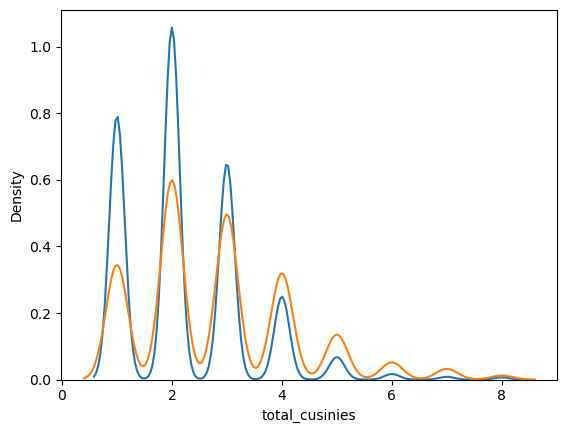

In [35]:
sns.distplot(data[data['target']==0]['total_cusinies'],hist=False,label=0)
sns.distplot(data[data['target']==1]['total_cusinies'],hist=False,label=1)

C:\Users\karna\AppData\Local\Temp\ipykernel_8768\560495702.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['target']==0]['total_cusinies'],hist=False,label=0)
C:\Users\karna\AppData\Local\Temp\ipykernel_8768\560495702.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

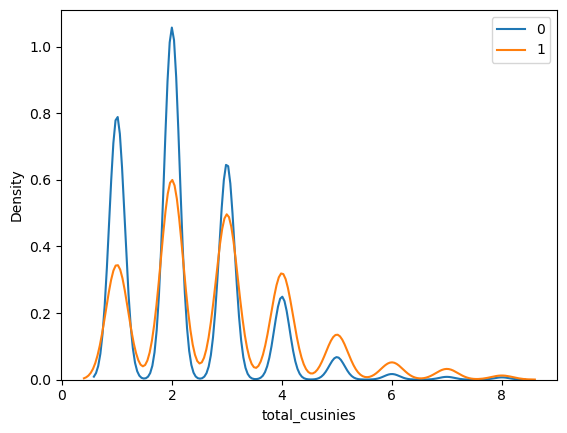

In [36]:
sns.distplot(data[data['target']==0]['total_cusinies'],hist=False,label=0)
sns.distplot(data[data['target']==1]['total_cusinies'],hist=False,label=1)
plt.legend()

In [37]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cusinies,rest_type_new,target
index,,,,,,,,,,,,,,,,,,,
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,1,1,0
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,None,0,+91 8197675843,Whitefield,Bar,Finger Food,600.0,[],[],Pubs and bars,Whitefield,1,1,0
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,None,0,None,Whitefield,Bar,Finger Food,2000.0,[],[],Pubs and bars,Whitefield,1,1,0


In [38]:
data=data.dropna()

In [39]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cusinies', 'rest_type_new',
       'target'],
      dtype='object')

In [40]:
filter_col=['online_order', 'book_table','votes','location', 'rest_type', 
       'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)','target']
data_fliter=data[filter_col]

In [41]:
data_fliter.shape

(44092, 9)

In [42]:
cat_var=[col for col in filter_col if data[col].dtype=='O' ]
num_var=[col for col in filter_col if data[col].dtype!='O' ]

In [43]:
data['online_order'].dtype

dtype('O')

In [44]:
num_var

['votes', 'approx_cost(for two people)', 'target']

In [45]:
# print num of fetures
#freq cat for top 5
#write if in cat fet or others
#same for listted in city
# $one hot encoding get dummies drop first

In [46]:
data['online_order'].nunique()
for i in filter_col:
    print("{} - {} ".format(i,data[i].nunique()))

online_order - 2 
book_table - 2 
votes - 2306 
location - 92 
rest_type - 87 
approx_cost(for two people) - 66 
listed_in(type) - 7 
listed_in(city) - 30 
target - 2 


In [47]:
cat_five=((data['rest_type'].value_counts()[0:6])/len(data)*100)

In [48]:
data['rest_type'].apply(lambda x: 'other' if x  not in cat_five.index else x)

index
0        Casual Dining
1        Casual Dining
2                other
3          Quick Bites
4        Casual Dining
             ...      
51710            other
51711            other
51712            other
51715            other
51716            other
Name: rest_type, Length: 44092, dtype: object

In [49]:
((data['listed_in(type)'].value_counts()[0:6])/len(data)*100)

listed_in(type)
Delivery              49.945568
Dine-out              34.069673
Desserts               6.633856
Cafes                  3.499501
Drinks & nightlife     2.422208
Buffet                 1.961807
Name: count, dtype: float64

In [52]:
# Start with the original data
processed_data = data.copy()

# Process each column separately to avoid memory overload
for col in ['online_order', 'book_table', 'rest_type', 'listed_in(type)', 'listed_in(city)']:
    # Generate dummy variables, but limit the number of unique categories
    top_categories = data[col].value_counts().index[:50]  # Keep only the top 50 categories
    data[col] = data[col].apply(lambda x: x if x in top_categories else 'Other')
    
    col_dummies = pd.get_dummies(data[col], prefix=col, drop_first=True, dtype=int)
    
    # Concatenate with processed_data
    processed_data = pd.concat([processed_data, col_dummies], axis=1)

# After processing, remove the original categorical columns if needed
processed_data.drop(columns=['online_order', 'book_table', 'rest_type', 'listed_in(type)', 'listed_in(city)'], inplace=True)

# 'processed_data' now contains the original data with dummy variables added


C:\Users\karna\AppData\Local\Temp\ipykernel_8768\133083083.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: x if x in top_categories else 'Other')
C:\Users\karna\AppData\Local\Temp\ipykernel_8768\133083083.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: x if x in top_categories else 'Other')
C:\Users\karna\AppData\Local\Temp\ipykernel_8768\133083083.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [53]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cusinies,rest_type_new,target
index,,,,,,,,,,,,,,,,,,,
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,4.0,0,+91 9148155994,Whitefield,Bar,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield,1,1,1
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,4,2,0
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,1,1,0
